# Week 3

## 1.Basic Object Detection Using OpenCV and Haar Cascades


In [8]:
import cv2

In [9]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [10]:
img = cv2.imread('/kaggle/input/dog-vs-cat/animal/cat/00001-4122619874.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [12]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

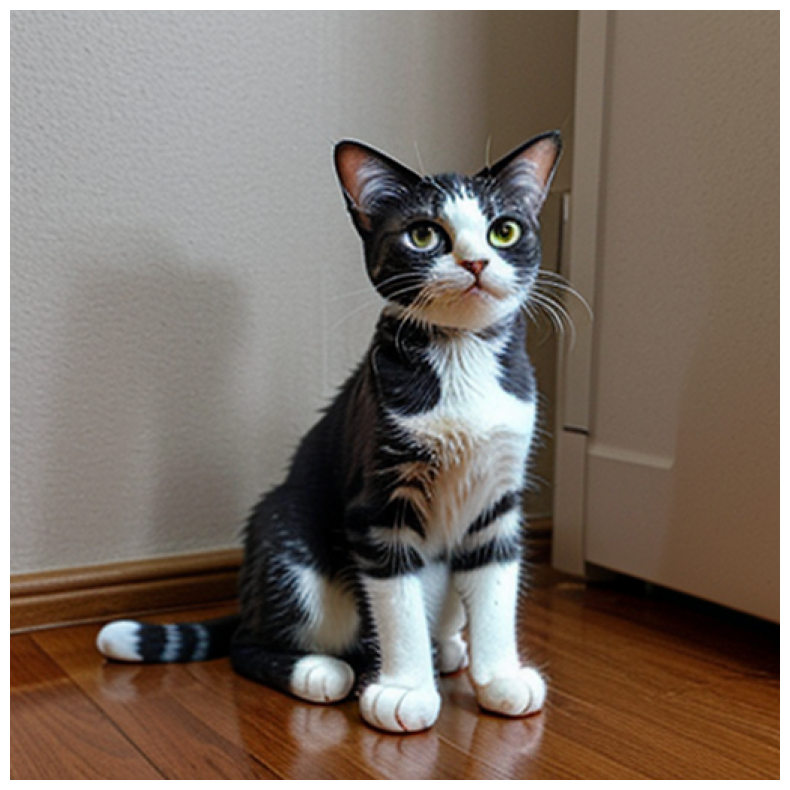

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [4]:
!pip install opencv-python-headless
!pip install numpy

In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names

--2024-08-07 03:34:27--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: 'yolov3.weights'

yolov3.weights      100%[===================>] 236.52M  10.5MB/s    in 23s     

2024-08-07 03:34:51 (10.3 MB/s) - 'yolov3.weights' saved [248007048/248007048]

--2024-08-07 03:34:52--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: 'yolov3.cfg'

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [6]:
import cv2
import numpy as np

In [7]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

In [8]:
img = cv2.imread('/kaggle/input/rought-girl-dog-image/dogand girl image.jpg')
height, width, channels = img.shape

In [9]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)


In [10]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]


In [11]:
outs = net.forward(output_layers)

In [12]:
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [13]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


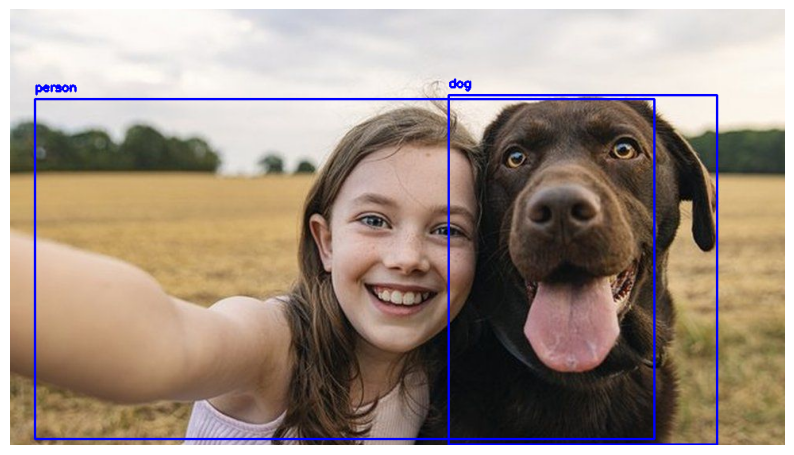

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [15]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [16]:
import cv2
import numpy as np

In [20]:
!wget http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2024-08-07 04:04:34--  http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.117.207, 142.250.99.207, 74.125.199.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.117.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177817887 (170M) [application/x-tar]
Saving to: 'mask_rcnn_inception_v2_coco_2018_01_28.tar.gz'

mask_rcnn_inception 100%[===================>] 169.58M   129MB/s    in 1.3s    

2024-08-07 04:04:36 (129 MB/s) - 'mask_rcnn_inception_v2_coco_2018_01_28.tar.gz' saved [177817887/177817887]



In [22]:
!tar -xvf mask_rcnn_inception_v2_coco_2018_01_28.tar.gz

mask_rcnn_inception_v2_coco_2018_01_28/
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
mask_rcnn_inception_v2_coco_2018_01_28/checkpoint
mask_rcnn_inception_v2_coco_2018_01_28/pipeline.config
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


In [32]:
net = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb', 'mask_rcnn_inception_v2_coco_2018_01_28/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt')

error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/caffe/caffe_io.cpp:1138: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "frozen_inference_graph.pb" in function 'ReadProtoFromBinaryFile'


In [ ]:
net = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb', 
                                    'mask_rcnn_inception_v2_coco_2018_01_28/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt')


In [ ]:
img = cv2.imread('input_image.jpg')
height, width = img.shape[:2]

In [ ]:
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)
net.setInput(blob)

In [ ]:
boxes, masks = net.forward(['detection_out_final', 'detection_masks'])

In [ ]:
detection_count = boxes.shape[2]
for i in range(detection_count):
    box = boxes[0, 0, i]
    class_id = int(box[1])
    score = box[2]
    if score > 0.5:
        x = int(box[3] * width)
        y = int(box[4] * height)
        x2 = int(box[5] * width)
        y2 = int(box[6] * height)
        roi = img[y:y2, x:x2]
        roi_height, roi_width = roi.shape[:2]
        mask = masks[i, class_id]
        mask = cv2.resize(mask, (roi_width, roi_height))
        mask = mask > 0.5
        roi[mask] = [0, 255, 0]
        img[y:y2, x:x2] = roi
        cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 2)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [28]:
ls mask_rcnn_inception_v2_coco_2018_01_28


checkpoint                      model.ckpt.index  saved_model/
frozen_inference_graph.pb       model.ckpt.meta
model.ckpt.data-00000-of-00001  pipeline.config


In [29]:
import os

pb_path = 'mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb'
pbtxt_path = 'mask_rcnn_inception_v2_coco_2018_01_28/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt'

if os.path.exists(pb_path) and os.path.exists(pbtxt_path):
    print("Model files found.")
else:
    print("Model files not found. Please check the paths.")


Model files not found. Please check the paths.


In [30]:
ls mask_rcnn_inception_v2_coco_2018_01_28


checkpoint                      model.ckpt.index  saved_model/
frozen_inference_graph.pb       model.ckpt.meta
model.ckpt.data-00000-of-00001  pipeline.config


In [35]:
!wget http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar -xvf mask_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2024-08-07 04:42:49--  http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.197.207, 173.194.203.207, 172.253.117.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.197.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177817887 (170M) [application/x-tar]
Saving to: 'mask_rcnn_inception_v2_coco_2018_01_28.tar.gz.1'

mask_rcnn_inception 100%[===================>] 169.58M   224MB/s    in 0.8s    

2024-08-07 04:42:50 (224 MB/s) - 'mask_rcnn_inception_v2_coco_2018_01_28.tar.gz.1' saved [177817887/177817887]

mask_rcnn_inception_v2_coco_2018_01_28/
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
mask_rcnn_inception_v2_coco_2018_01_28/checkpoint
mask_rcnn_inception_v2_coco_2018_01_28/pipeline.config
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
mask_rcnn_inception_v2_coco_2018_01_28/mod

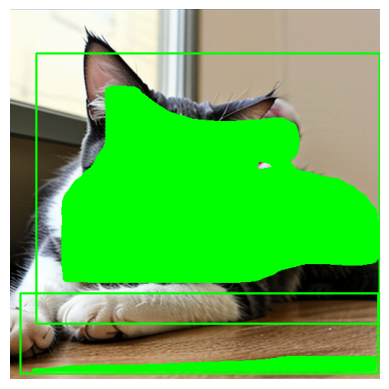

In [6]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Install necessary packages (for local execution)
# !pip install torch torchvision

# Load a pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image
image = cv2.imread("/kaggle/input/dog-vs-cat/animal/cat/00007-4122619880.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Transform the image to a tensor
image_tensor = F.to_tensor(image_rgb)

# Add a batch dimension
image_tensor = image_tensor.unsqueeze(0)

# Perform inference
with torch.no_grad():
    outputs = model(image_tensor)

# Get the masks, boxes, and labels
masks = outputs[0]['masks']
boxes = outputs[0]['boxes']
labels = outputs[0]['labels']
scores = outputs[0]['scores']

# Set the confidence threshold
conf_threshold = 0.5

# Loop over the detections
for i in range(len(masks)):
    if scores[i] > conf_threshold:
        # Extract the mask and bounding box
        mask = masks[i, 0].mul(255).byte().cpu().numpy()
        box = boxes[i].cpu().numpy().astype(int)
        label = labels[i].cpu().numpy()

        # Apply the mask to the image
        mask = cv2.resize(mask, (box[2] - box[0], box[3] - box[1]))
        mask = mask > 128

        roi = image[box[1]:box[3], box[0]:box[2]]
        roi[mask] = [0, 255, 0]

        # Draw the bounding box
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

# Convert BGR image to RGB for displaying with matplotlib
output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the output image using matplotlib
plt.imshow(output_image)
plt.axis('off')  # Hide the axis
plt.show()
